# 01-NBS Data Exploration

## Purpose

This notebook has the purpose to make some data exploration in the train/validation/test dataset and understand the features present in the dataset

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import fireducks.pandas as pd

## Load Train Dataset

In [ ]:
train_df = pd.read_csv("../data/01_raw/jigsaw-toxic-comment-train.csv")
train_df

In [ ]:
train_df.columns

In [ ]:
print("Missing values: ")
train_df.isnull().sum()

In [ ]:
print("Feature distribution: ")
train_df.describe()

### Univariate Analysis

In [ ]:
for feature in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    sns.countplot(x=train_df[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()

### Mutivariate Analysis (Correlation heatmap & Pairwise joint occurences)

In [ ]:
correlation_matrix = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [ ]:
combinations = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1).value_counts()
combinations.sort_index(inplace=True)
plt.bar(combinations.index, combinations.values)
plt.title("Number of Features Present per Row")
plt.xlabel("Number of Features Marked as 1")
plt.ylabel("Count")
plt.show()

### Pairwise Relationships

In [ ]:
pd.crosstab(train_df["toxic"], train_df["insult"]).plot(kind="bar", stacked=True)
plt.title("Co-occurrence of Toxic and Insult")
plt.xlabel("Toxic")
plt.ylabel("Count")
plt.legend(title="Insult", loc="upper right")
plt.show()

### Insights and Observations

- There a patner of imballenced ``toxic/severe_toxic/obscene/threat/insult/identity_hate`` comment related to normal comments. 
- For correlation Heatmap we have that:
    - `toxic` samples has 29% of positive correlation related to `severe_toxic`;
    - `toxic` samples has 70% of positive correlation related to `obscene` categorie;
    - `toxic` samples has 16% of positive correlation (almost null correlation) related to `threat` categorie;
    - `toxic` samples has 67% of positive correlation related to `insult` categorie;
    - `toxic` samples has 28% of positive correlation related to `identity_hate` categorie.

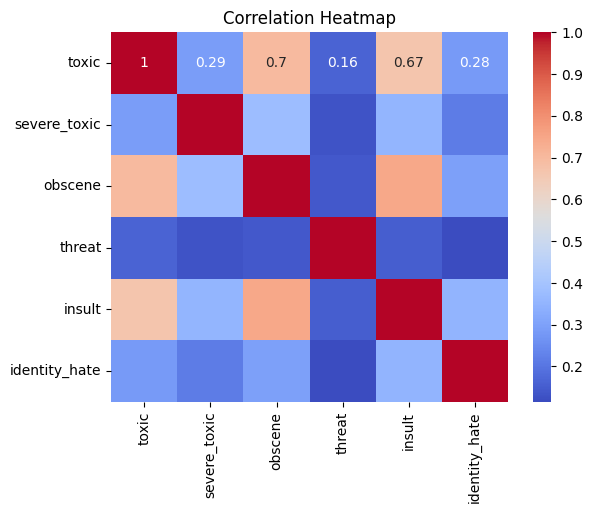